# Ames Housing Project.
#### Linear Regression Model Fitting.
In this project I'm going to build a linear regression model to get insights about what makes a house get sold for higher prices and predict the sold prices for different houses.
I will go through some steps to clean the data and get it ready for model learning and then try different algorithms
to get the best training and test Coefficient of determination (R Squared Value).

### Loading data

In [1]:
# importing classes and libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
#----------------------------------
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import inv_boxcox
#----------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = ['Data']
filepath = os.sep.join(data_path + ['Ames Housing Data.tsv'])
data = pd.read_csv(filepath, sep = '\t')

In [3]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
data = data.drop(['Order', 'PID'], axis = 1)
ames = data.copy() # Keeping a copy of the original data

# Exploratory Data Analysis

### One Hot Encoding

In [6]:
# getting columns of categorical data
ohe_data = ames.dtypes[ames.dtypes == object]
ohe_cols = ohe_data.index.tolist()
ames[ohe_cols].head() # getting insights about categorical data only

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [7]:
# one hot encoding categorical data
new_ames = pd.get_dummies(ames, columns = ohe_cols, drop_first = True)
new_ames.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


### Skewed Data

In [8]:
# getting skewed data
float_cols = new_ames.columns[new_ames.dtypes == float]
skew_vals = new_ames[float_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(0.75)))
skew_cols

,Skew
BsmtFin SF 2,4.139978
Bsmt Half Bath,3.940795
Mas Vnr Area,2.606985
Lot Frontage,1.499067
BsmtFin SF 1,1.416182
Total Bsmt SF,1.156204
Bsmt Unf SF,0.923053


9.771311459093761e-05

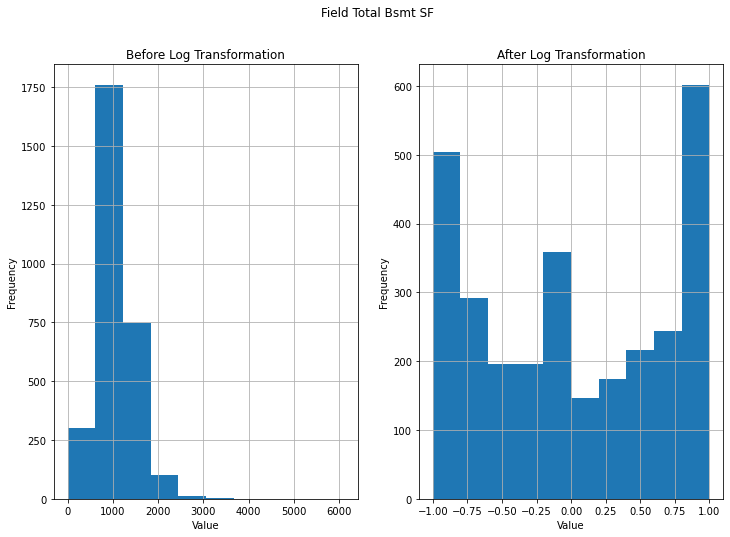

In [9]:
# visualizing the effect of log transfromation on one variable
var = 'Total Bsmt SF'
# 'BsmtFin SF 2' sin
# 'Total Bsmt SF' sin
# 'Bsmt Unf SF' sin
# 'Lot Frontage' sin
# 'Mas Vnr Area' log1p
# 'BsmtFin SF 1' log1p
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize = (12, 8))
new_ames[var].hist(ax = ax_before)
new_ames[var].apply(np.sin).hist(ax = ax_after)
ax_before.set(title = 'Before Log Transformation', xlabel = 'Value', ylabel = 'Frequency')
ax_after.set(title = 'After Log Transformation', xlabel = 'Value', ylabel = 'Frequency')
fig.suptitle(f'Field {var}');
new_ames[var].apply(np.sin).skew()

In [10]:
# applying feature transformation as following
#---------------------------------------------
# 'BsmtFin SF 2' sin
# 'Total Bsmt SF' sin
# 'Bsmt Unf SF' sin
# 'Lot Frontage' sin
# 'Mas Vnr Area' log1p
# 'BsmtFin SF 1' log1p
#---------------------------------------------
new_ames['BsmtFin SF 2'] = new_ames['BsmtFin SF 2'].apply(np.sin)
new_ames['Total Bsmt SF'] = new_ames['Total Bsmt SF'].apply(np.sin)
new_ames['Bsmt Unf SF'] = new_ames['Bsmt Unf SF'].apply(np.sin)
new_ames['Lot Frontage'] = new_ames['Lot Frontage'].apply(np.sin)
new_ames['BsmtFin SF 1'] = new_ames['BsmtFin SF 1'].apply(np.log1p)
new_ames['Mas Vnr Area'] = new_ames['Mas Vnr Area'].apply(np.log1p)

In [11]:
# checking improvment in skewed data
float_cols = new_ames.columns[new_ames.dtypes == float]
skew_vals = new_ames[float_cols].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(0.75)))
skew_cols

,Skew
Bsmt Half Bath,3.940795


In [12]:
# renaming columns after transformation
new_ames.rename(columns = {
    'BsmtFin SF 2' : 'sin(BsmtFin SF 2)',
    'Total Bsmt SF' : 'sin(Total Bsmt SF)',
    'Bsmt Unf SF' : 'sin(Bsmt Unf SF)',
    'Lot Frontage' : 'sin(Lot Frontage)',
    'BsmtFin SF 1' : 'log(BsmtFin SF 1)',
    'Mas Vnr Area' : 'log(Mas Vnr Area)'
})

,MS SubClass,sin(Lot Frontage),Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,log(Mas Vnr Area),log(BsmtFin SF 1),sin(BsmtFin SF 2),...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,0.363171,31770,6,5,1960,1960,4.727388,6.461468,0.000000,...,0,0,0,0,1,0,0,0,1,0
1,20,-0.993889,11622,5,6,1961,1961,0.000000,6.150603,-0.491022,...,0,0,0,0,1,0,0,0,1,0
2,20,-0.629888,14267,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,20,-0.948282,11160,7,5,1968,1968,0.000000,6.971669,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,60,-0.985146,13830,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,-0.643538,7937,6,6,1984,1984,0.000000,6.709304,0.000000,...,0,0,0,0,1,0,0,0,1,0
2926,20,NaN,8885,5,5,1983,1983,0.000000,5.710427,-0.404065,...,0,0,0,0,1,0,0,0,1,0
2927,85,-0.739181,10441,5,5,1992,1992,0.000000,5.823046,0.000000,...,0,0,0,0,1,0,0,0,1,0
2928,20,0.999520,10010,5,5,1974,1975,0.000000,6.977281,-0.459903,...,0,0,0,0,1,0,0,0,1,0


### Missing Data

In [13]:
new_ames.isnull().sum().sort_values()

MS SubClass            0
Foundation_CBlock      0
Foundation_PConc       0
Foundation_Slab        0
Foundation_Stone       0
                    ... 
Bsmt Full Bath         2
Bsmt Half Bath         2
Mas Vnr Area          23
Garage Yr Blt        159
Lot Frontage         490
Length: 262, dtype: int64

In [14]:
# taking the simplest approach and filling NAN values with zeros
new_ames = new_ames.fillna(0)
new_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 262 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(11), int64(26), uint8(225)
memory usage: 1.5 MB


# Modeling

### using `LinearRegression` class and validating using `train_test_split` and `KFold`

In [15]:
# using train_test_split class
X = new_ames.drop(['SalePrice'], axis = 1)
Y = new_ames['SalePrice']
train_scores = []
test_scores = []
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
    lr = LinearRegression().fit(X_train, Y_train)
    train_scores.append(r2_score(Y_train, lr.predict(X_train)))
    test_scores.append(r2_score(Y_test, lr.predict(X_test)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9323490559270612
mean test sets r2 score = 0.8464063980139376


In [16]:
# using kfold class
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(new_ames):
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    lr = LinearRegression().fit(X_train, Y_train)
    train_scores.append(r2_score(Y_train, lr.predict(X_train)))
    test_scores.append(r2_score(Y_test, lr.predict(X_test)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9296682113805559
mean test sets r2 score = 0.822812000686888


### using `RidgeCV` and `Ridge` classes and validating using `train_test_split` and `KFold`

In [17]:
# using RidgeCV class to get the best alpha value
alphas = np.array([0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80])
ridge_cv = RidgeCV(alphas = alphas, cv = 5).fit(X, Y)
print(f'best alpha = {ridge_cv.alpha_}')

best alpha = 5.0


In [18]:
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
ridge_cv = RidgeCV(alphas = alphas, cv = kf).fit(X, Y)
print(f'best alpha = {ridge_cv.alpha_}')

best alpha = 10.0


In [19]:
# training a model using alpha = 5 with train_test_split
s = StandardScaler()
train_scores = []
test_scores = []
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    ridge = Ridge(alpha = 5, max_iter = 1e6).fit(X_train_s, Y_train)
    train_scores.append(r2_score(Y_train, ridge.predict(X_train_s)))
    test_scores.append(r2_score(Y_test, ridge.predict(X_test_s)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9316329628475197
mean test sets r2 score = 0.8625572381175404


In [20]:
# training a model using alpha = 10 with kfold
s = StandardScaler()
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(new_ames):
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    ridge = Ridge(alpha = 10, max_iter = 1e6).fit(X_train_s, Y_train)
    train_scores.append(r2_score(Y_train, ridge.predict(X_train_s)))
    test_scores.append(r2_score(Y_test, ridge.predict(X_test_s)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9284188507826581
mean test sets r2 score = 0.8483794251079375


### using `LassoCV` and `Lasso` classes and validating using `train_test_split` and `KFold`

In [21]:
# using LassoCV class to get the best alpha value
alphas = np.array([1e-5, 5e-5, 0.0001, 0.0005])
lasso_cv = LassoCV(alphas = alphas, cv = 5).fit(X, Y)
print(f'best alpha = {lasso_cv.alpha_}')

best alpha = 0.0005


In [22]:
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
lasso_cv = LassoCV(alphas = alphas, cv = kf).fit(X, Y)
print(f'best alpha = {lasso_cv.alpha_}')

best alpha = 0.0005


In [23]:
# training a model using alpha = 0.0005 with train_test_split
s = StandardScaler()
train_scores = []
test_scores = []
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    lasso = Lasso(alpha = 0.0005).fit(X_train_s, Y_train)
    train_scores.append(r2_score(Y_train, lasso.predict(X_train_s)))
    test_scores.append(r2_score(Y_test, lasso.predict(X_test_s)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9323481323647489
mean test sets r2 score = 0.8464610337142078


In [24]:
# training a model using alpha = 0.0005 with kfold
s = StandardScaler()
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(new_ames):
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    lasso = Lasso(alpha = 0.0005).fit(X_train_s, Y_train)
    train_scores.append(r2_score(Y_train, lasso.predict(X_train_s)))
    test_scores.append(r2_score(Y_test, lasso.predict(X_test_s)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9296597130858686
mean test sets r2 score = 0.8240729706857728


### using `ElasticNetCV` and `ElasticNet` classes and validating using `train_test_split` and `KFold`

In [25]:
# using LassoCV class to get the best alpha value
alphas = np.array([1e-5, 5e-5, 0.0001, 0.0005])
l1_ratios = np.linspace(0.1, 0.9, 9)
elastic_cv = ElasticNetCV(alphas = alphas, l1_ratio = l1_ratios, cv = 5).fit(X, Y)
print(f'best alpha = {elastic_cv.alpha_}')
print(f'best L1 ratio = {elastic_cv.l1_ratio_}')

best alpha = 0.0005
best L1 ratio = 0.1


In [26]:
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
elastic_cv = ElasticNetCV(alphas = alphas, l1_ratio = l1_ratios, cv = kf).fit(X, Y)
print(f'best alpha = {elastic_cv.alpha_}')
print(f'best L1 ratio = {elastic_cv.l1_ratio_}')

best alpha = 0.0005
best L1 ratio = 0.1


In [27]:
# training a model using alpha = 0.0005 and L1 ratio = 0.1 with train_test_split
s = StandardScaler()
train_scores = []
test_scores = []
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    elastic = ElasticNet(alpha = 0.0005, l1_ratio = 0.1).fit(X_train_s, Y_train)
    train_scores.append(r2_score(Y_train, elastic.predict(X_train_s)))
    test_scores.append(r2_score(Y_test, elastic.predict(X_test_s)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9323059824722894
mean test sets r2 score = 0.8506844588700881


In [28]:
# training a model using alpha = 0.0005 and L1 ratio = 0.1 with kfold
s = StandardScaler()
kf = KFold(shuffle = True, n_splits = 5, random_state = 42)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(new_ames):
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]
    X_train_s = s.fit_transform(X_train)
    X_test_s = s.transform(X_test)
    elastic = ElasticNet(alpha = 0.0005, l1_ratio = 0.1).fit(X_train_s, Y_train)
    train_scores.append(r2_score(Y_train, elastic.predict(X_train_s)))
    test_scores.append(r2_score(Y_test, elastic.predict(X_test_s)))
#----------------------------------------------------------------------------------
print(f'mean training sets r2 score = {np.mean(train_scores)}')
print(f'mean test sets r2 score = {np.mean(test_scores)}')

mean training sets r2 score = 0.9296132131161929
mean test sets r2 score = 0.8290307535828216


# ---------------------------------------------------------------------------------------------------------------

## Best model up till now is `Ridge` Regression Model with `alpha = 5`

# --------------------------------------------------------------------------------------------------------------

In [29]:
ridge = Ridge(alpha = 5, max_iter = 1e6)
standard = StandardScaler()
X = new_ames.drop(['SalePrice'], axis = 1)
Y = new_ames['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train_s = standard.fit_transform(X_train)
X_test_s = standard.transform(X_test)
Y_train_bc, Lambda = boxcox(Y_train)
Y_test_bc = boxcox(Y_test, Lambda)
ridge = ridge.fit(X_train_s, Y_train_bc)
Y_train_predict_bc = ridge.predict(X_train_s)
Y_test_predict_bc = ridge.predict(X_test_s)
Y_train_predict = inv_boxcox(Y_train_predict_bc, Lambda)
Y_test_predict = inv_boxcox(Y_test_predict_bc, Lambda)
r2_train = r2_score(Y_train, Y_train_predict)
r2_test = r2_score(Y_test, Y_test_predict)
#----------------------------------------------------------------------------------
print(f'training set R2 score = {r2_train}')
print(f'test set R2 score = {r2_test}')

training set R2 score = 0.949773503898613
test set R2 score = 0.8656160670563668


In [30]:
coefficients = pd.DataFrame(list(zip(X.columns.tolist(), ridge.coef_))).rename(columns = {0 : 'Features', 1 : 'Coefficients'})
coefficients.to_excel('Coefficients.xlsx')
coefficients.head(15)

,Features,Coefficients
0,MS SubClass,-0.024645
1,Lot Frontage,-0.001350
2,Lot Area,0.032563
3,Overall Qual,0.115157
4,Overall Cond,0.064558
5,Year Built,0.084995
6,Year Remod/Add,0.012820
7,Mas Vnr Area,0.010888
8,BsmtFin SF 1,0.113524
9,BsmtFin SF 2,0.004516


# End of Project
Hossam Gamal Mostafa, 
Egypt Syndicate of Engineers, 
Nuclear and Radiation Engineering.